In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.colors import to_rgba
import os
import sys
from tqdm.notebook import tqdm
import statistics

# get version
print("Matplotlib version",mpl.__version__)

mpl.rc('font', family = 'Arial')
plt.ioff()

fp = "G:\\My Drive\\Darby Work\\Ytsma and Dyar 2021 (LOD paper)\\"
# read in results
data = pd.read_csv(fp + "average_train_results.csv")
# detailed results
detail_data = pd.read_csv(fp + "train_results.csv")

Matplotlib version 3.4.2


In [2]:
# REMOVE NORMALIZED RESULTS
data = data[data.normalization=='norm3'].reset_index(drop=True).drop(columns='normalization')
detail_data = detail_data[detail_data.normalization=='norm3'].reset_index(drop=True).drop(columns='normalization')

# Get compositional overview

In [39]:
mhc_comps = pd.read_csv(fp+'tables\\TableS1_MHC_sample_compositions.csv')
lanl_comps = pd.read_csv(fp+'tables\\TableS2_LANL_sample_compositions.csv')

# remove units
mhc_comps.columns = mhc_comps.columns.str.strip(' (wt%)| (ppm)')
lanl_comps.columns = lanl_comps.columns.str.strip(' (wt%)| (ppm)')

In [45]:
outlier_limits = pd.read_csv('Z:\\Millennium Set\\NEW_OUTLIER_LIMITS.csv')
iqr_outliers = dict(zip(outlier_limits.element, outlier_limits.iqr_q3_outlier_limit))
natl_outliers = dict(zip(outlier_limits.element, outlier_limits.highest_natural_for_doped))

In [68]:
count = 0
for comps in [mhc_comps, lanl_comps]:
    
    if count==0:
        name='MHC'
    else:
        name="LANL"
    count+=1
    
    elem_list = []
    mean_list = []
    med_list = []
    max_list = []
    n_list=[]
    imean_list = []
    imed_list = []
    imax_list = []
    in_list=[]
    nmean_list = []
    nmed_list = []
    nmax_list = []
    nn_list=[]
    iqr_list = []
    natl_list = []
    
    for element in mhc_comps.columns[2:]:
        
        iqr_out = iqr_outliers[element]
        natl_out = natl_outliers[element]
    
        all_data = list(comps[~comps[element].isna()][element])
        n_all = len(all_data)
        all_mean = round(statistics.mean(all_data),3)
        all_median = round(statistics.median(all_data),3)
        all_max = round(max(all_data),3)
        
        iqr_data = list(comps[comps[element] <= iqr_out][element])
        n_iqr = len(iqr_data)
        iqr_mean = round(statistics.mean(iqr_data),3)
        iqr_median = round(statistics.median(iqr_data),3)
        iqr_max = round(max(iqr_data),3)
        
        if ~np.isnan(natl_out):
            natl_data = list(comps[comps[element] <= natl_out][element])
            n_natl = len(natl_data)
            natl_mean = round(statistics.mean(natl_data),3)
            natl_median = round(statistics.median(natl_data),3)
            natl_max = round(max(natl_data),3)
        else:
            n_natl = 'NA'
            natl_mean = 'NA'
            natl_median = 'NA'
            natl_max = 'NA'
            natl_out = 'NA'
        
        elem_list.append(element)
        n_list.append(n_all)
        mean_list.append(all_mean)
        med_list.append(all_median)
        max_list.append(all_max)
        in_list.append(n_iqr)
        imean_list.append(iqr_mean)
        imed_list.append(iqr_median)
        imax_list.append(iqr_max)
        nn_list.append(n_natl)
        nmean_list.append(natl_mean)
        nmed_list.append(natl_median)
        nmax_list.append(natl_max)
        natl_list.append(natl_out)
        iqr_list.append(iqr_out)
        
    results = pd.DataFrame({
        'element':elem_list,
        'all_n':n_list,
        'all_med':med_list,
        'all_mean':mean_list,
        'all_max':max_list,
        'natl_lim':natl_list,
        'natl_n':nn_list,
        'natl_med':nmed_list,
        'natl_mean':nmean_list,
        'natl_max':nmax_list,
        'iqr_lim':iqr_list,
        'iqr_n':in_list,
        'iqr_med':imed_list,
        'iqr_mean':imean_list,
        'iqr_max':imax_list
    })
    
    results.to_csv(fp+name+'_sample_summary.csv', index=False)

# Braga regions
CADILLAC ChemLIBS

In [5]:
cad = pd.read_csv(fp + "figures\\cadillac_spectra.csv")
peaks = pd.read_csv(fp + "figures\\braga_peaks.csv") 
noise = pd.read_csv(fp + "figures\\braga_noise_regions.csv") 

In [7]:
# plot defining things
height = 0.052
b_y = -.003
box_list = []
rcolor = '#8b8b8b'
base='black'
b_a =1
alpha = 0.5
lwidth=1
x_data = cad['wave']
y_data = cad['intensity']
peak_x = peaks['peak']
peak_y = peaks['intensity']
peak_labs = peaks['element']
size=70
mark="*"
mwidth=0.5
mcolor='goldenrod'
c_l = 'navy'
c_m = 'goldenrod'
llabel = 'LANL (ChemCam)'
mlabel = 'MHC (ChemLIBS)'
ysize = 12
lsize = 14
tsize = 16
klen = 5

NameError: name 'cad' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

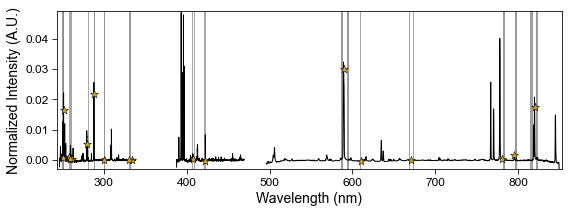

In [19]:
# get width of regions
noise['width'] = noise['stop'] - noise['start']

#make rectangles
for i in np.array(range(len(noise))):
    x = noise['start'][i]  
    width = noise['width'][i]
    box_list.append(Rectangle((x, b_y), width, height))
    
pc = PatchCollection(box_list, edgecolor = to_rgba(rcolor, alpha), facecolor=to_rgba(rcolor, alpha))
#pc = PatchCollection(box_list, hatch = '..')

# plot it all
fig, ax = plt.subplots(1, figsize = (8,3))
ax.plot(x_data, y_data, color=base, linewidth = lwidth, alpha = b_a, zorder=1) #spectrum
ax.scatter(peak_x, peak_y, facecolor = mcolor, edgecolor=base, s = size, marker = mark, linewidth = mwidth, zorder=3) # peaks
ax.add_collection(pc) # noise regions
ax.margins(x=0.005, y=0.0)
ax.set_xlabel('Wavelength (nm)', fontsize=lsize)
ax.set_ylabel('Normalized Intensity (A.U.)', fontsize = lsize)
ax.tick_params(length=klen, labelsize=ysize)

plt.tight_layout()
plt.savefig(fp + "figures\\braga_regions.eps", dpi=600)
plt.savefig(fp + "figures\\braga_regions.jpg", dpi=600)
plt.show()

### compare 0-750 and 250-1000

In [ ]:
# 0-750 regression vector
coeffs750 = pd.read_csv("C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\ChemLIBS calculations\\models\\Mars\\0-750\\Li_coeffs.csv")
coeffs750 = coeffs750.reset_index().transpose()
coeffs750.columns = coeffs750.iloc[0]
coeffs750 = coeffs750.drop(coeffs750.index[0]).reset_index(drop=True)
coeffs750.columns = ['wave', '0-750']
# 250-1000 regression vector
coeffs250 = pd.read_csv("C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\ChemLIBS calculations\\models\\Mars\\250-1000\\Li_coeffs.csv")
coeffs250 = coeffs250.reset_index().transpose()
coeffs250.columns = coeffs250.iloc[0]
coeffs250 = coeffs250.drop(coeffs250.index[0]).reset_index(drop=True)
coeffs250.columns = ['wave', '250-1000']
# merge
coeffs = pd.merge(coeffs750, coeffs250, on='wave')
# add CADILLAC spectrum
cad.columns = ['wave', 'CADILLAC']
coeffs = pd.merge(coeffs, cad, on='wave')
coeffs['CADILLAC'] = coeffs['CADILLAC'] * 100000 # make larger to match scale

In [ ]:
# data
wave = coeffs['wave']
cf_750 = coeffs['0-750']
cf_250 = coeffs['250-1000']
cadillac = coeffs['CADILLAC']
# format
c_cad = 'black'
c_750 = 'darkgreen'
c_250 = 'lightgreen'
xlab = 'Wavelength (nm)'
ylab = 'Weight or Normalized Intensity (A.U.)'
xsize=20
lsize=14
a = 0.6
l_cad = 'CADILLAC'
l_750 = '0-750 Regression Vector'
l_250 = '250-1000 Regression Vector'

fig, ax = plt.subplots(1, figsize = (10,6))
ax.plot(wave, cadillac, c = c_cad, alpha = a, zorder = 1, label = l_cad)
ax.plot(wave, cf_750, c = c_750, zorder = 2, label = l_750)
ax.plot(wave, cf_250, c = c_250, alpha = a, zorder = 3, label = l_250)
ax.set_xlim(240,855)
ax.set_xlabel(xlab, fontsize = xsize)
ax.set_ylabel(ylab, fontsize = xsize)
ax.tick_params(length=klen, labelsize=tsize)
ax.legend(fontsize = lsize, loc=(0.27,0.77))

# save image
path = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\reg_vector_compare.eps"
path1 = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\reg_vector_compare.jpeg"
plt.savefig(path, bbox_inches="tight") # save as .eps
plt.savefig(path1, bbox_inches="tight") # save as .jpeg

plt.show()

In [ ]:
# data
x_750 = pred_true_750['Actual']
y_750 = pred_true_750['Pred']
x_250 = pred_true_250['Actual']
y_250 = pred_true_250['Pred']
# format
c_750 = 'darkgreen'
c_250 = 'lightgreen'
xlab = 'Actual Li (ppm)'
ylab = 'Predicted Li (ppm)'
xsize=20
lsize=14
ddash = (0, (10, 2))
l_type = 'solid'
a = 0.6
c_e = "#bfbfbf"
c_g = "darkgrey"
c_p = 'black'
linew = 0.5
lwidht = 1
line_c = 'white'
cap = 2.5
l_750 = '0-750 Model'
l_250 = '250-1000 Model'

fig, ax = plt.subplots(1, figsize = (6,6))
# data
ax.scatter(x_750, y_750, c = c_750, linewidth = linew, alpha = a, edgecolors = line_c, label = l_750, zorder=4)
ax.scatter(x_250, y_250, c = c_250, linewidth = linew, edgecolors = line_c, label = l_250, zorder=3)
ax.axhline(y=0, xmin=0, xmax=1, c=c_p, linewidth=1, linestyle = l_type) # 0 line

# error bars (line for each model bc too much overlap otherwise)
#ax.errorbar(x=x_750, y=y_750, c=c_e, xerr=xerr, yerr=err_750, alpha = a, capsize=cap, fmt='o', zorder=1)
#ax.errorbar(x=x_250, y=y_250, c=c_e, xerr=xerr, yerr=err_250, alpha = a, capsize=cap, fmt='o', zorder=2)
ax.errorbar(x=210, y=65, c=c_250, xerr=0, yerr=err_250, capsize=3)
ax.errorbar(x=180, y=65, c=c_750, xerr=0, yerr=err_750, capsize=3)

# 1:1 line
y_bot, y_top = ax.get_ylim() # get current auto-axes
x_bot, x_top = ax.get_xlim()
top = max(y_top, x_top)
bot = min(y_bot, x_bot, 0)
ax.set_xlim(x_bot, x_top) # reset to original axes
ax.set_ylim(y_bot, y_top)
ax.plot([bot,top], [bot,top], c=c_p, linewidth=lwidth, linestyle = ddash, label = "1:1")

# formatting
ax.set_xlabel(xlab, fontsize = xsize)
ax.set_ylabel(ylab, fontsize = xsize)
ax.tick_params(length=klen, labelsize=lsize)
ax.legend(fontsize = lsize)

# save image
plt.savefig(fp+'\\figures\\pred_true_compare.eps', bbox_inches="tight") # save as .eps

plt.show()

## compare LOQ

In [3]:
mhc_sum = pd.read_csv(fp+'MHC_sample_summary.csv')

In [4]:
iqr_means = dict(zip(mhc_sum.element, mhc_sum.iqr_mean))
natl_means = dict(zip(mhc_sum.element, mhc_sum.natl_mean))
iqr_meds = dict(zip(mhc_sum.element, mhc_sum.iqr_med))
natl_meds = dict(zip(mhc_sum.element, mhc_sum.natl_med))

In [5]:
# add median and mean values
data['mean'] = np.nan
data['median'] = np.nan

for elem in data.element.unique():
    data.loc[(data.element==elem) & (data.outlier_defn=='high_natl'), 'mean'] = natl_means[elem]
    data.loc[(data.element==elem) & (data.outlier_defn=='high_natl'), 'median'] = natl_meds[elem]
    data.loc[(data.element==elem) & (data.outlier_defn=='iqr_q3'), 'median'] = iqr_meds[elem]
    data.loc[(data.element==elem) & (data.outlier_defn=='iqr_q3'), 'mean'] = iqr_means[elem]

In [6]:
# get loqs as percent
data['loq_per_med'] = (data['loq'] / data['median']) * 100
data['loq_per_mean'] = (data['loq'] / data['mean']) * 100

In [8]:
data.to_csv(fp+'results_with_percents.csv', index=False)

## Compare LOQ for method 1 to LOQ for method 2 
(for atms, use Mars as method 1, earth & vac for method 2)
#### OUTLIER REMOVAL

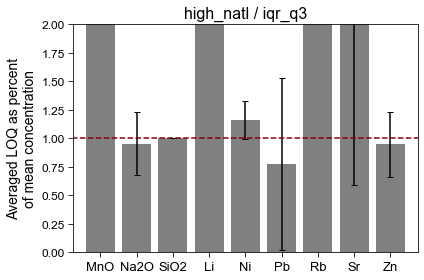

In [25]:
elem_list = ['MnO', 'Na2O', 'SiO2', 'Li', 'Ni', 'Pb', 'Rb', 'Sr', 'Zn']
vals = []
sds = []
elems = []
for element in elem_list:
    temp = []
    for atm in data.atmosphere.unique():
        df = data[(data.element==element)&
                  (data.instrument=='CL')&
                  (data.atmosphere==atm)&
                  (data.sens_method=='braga')].copy(deep=True)

        natl_val = df[df.outlier_defn=='high_natl'].reset_index(drop=True)['loq_per_mean'][0]
        iqr_val = df[df.outlier_defn=='iqr_q3'].reset_index(drop=True)['loq_per_mean'][0]

        ratio =  natl_val / iqr_val
        temp.append(ratio)

    # get avg and std of ratio per element
    avg = statistics.mean(temp)
    sd = np.std(temp)
    
    elems.append(element)
    vals.append(avg)
    sds.append(sd)
    
out_ratios = pd.DataFrame({
    'element':elems,
    'ratio_avg':vals,
    'ratio_sd':sds
})

plt.bar(out_ratios.index, 
        out_ratios.ratio_avg, 
        yerr=out_ratios.ratio_sd, 
        tick_label=out_ratios.element,
        capsize=3,
        color='grey')
plt.tick_params(length=5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.hlines(1, -1, 9, color='darkred', linestyles='dashed')
plt.title('high_natl / iqr_q3', fontsize = 16)
plt.ylabel('Averaged LOQ as percent\nof mean concentration', fontsize=14)
plt.ylim(0,2)
plt.xlim(-0.75, 8.75)
plt.tight_layout()
plt.savefig(fp + "figures\\outlier_loq_mean_ratio.eps", dpi=600)
plt.show()

#### get compositional variance for each

In [55]:
iqr_list = []
iqr_plist = []
natl_list = []
natl_plist = []

for element in mhc_comps.columns[2:]:
    
    iqr_out = iqr_outliers[element]
    natl_out = natl_outliers[element]
    
    iqr_data = mhc_comps[mhc_comps[element] <= iqr_out][element]
    iqr_mean = statistics.mean(iqr_data)
    
    if pd.isna(natl_out):
        natl_data = mhc_comps[~mhc_comps[element].isna()][element]
    else:
        natl_data = mhc_comps[mhc_comps[element] <= natl_out][element]
    natl_mean = statistics.mean(natl_data)
        
    iqr_var = iqr_data.var()
    iqr_var_p = (iqr_var / iqr_mean)*100
    iqr_list.append(iqr_var)
    iqr_plist.append(iqr_var_p)
    
    natl_var = natl_data.var()
    natl_var_p = (natl_var / natl_mean)*100
    natl_list.append(natl_var)
    natl_plist.append(natl_var_p)
    
variance_comp = pd.DataFrame({
    'element':mhc_comps.columns[2:],
    'iqr_variance':iqr_list,
    'iqr_var_per_mean':iqr_plist,
    'natl_variance':natl_list,
    'natl_var_per_mean':natl_plist
})

variance_comp.to_csv(fp+'variance_comparison.csv', index=False)

#### INSTRUMENT

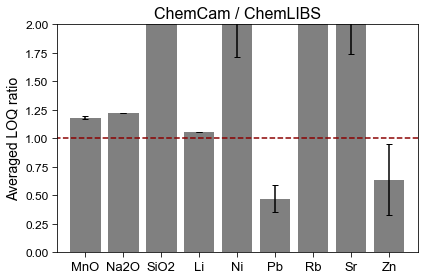

In [20]:
vals = []
sds = []
elems = []
for element in elem_list:
    temp = []
    for out in data.outlier_defn.unique():
        df = data[(data.element==element)&
                  (data.outlier_defn==out)&
                  (data.atmosphere=='Mars')&
                  (data.sens_method=='braga')].copy(deep=True)

        cc_val = df[df.instrument=='CC'].reset_index(drop=True)['loq'][0]
        cl_val = df[df.instrument=='CL_CC'].reset_index(drop=True)['loq'][0]

        ratio =  cc_val / cl_val
        temp.append(ratio)
    
    # get avg and std of ratio per element
    avg = statistics.mean(temp)
    sd = np.std(temp)
    
    elems.append(element)
    vals.append(avg)
    sds.append(sd)
    
inst_ratios = pd.DataFrame({
    'element':elems,
    'ratio_avg':vals,
    'ratio_sd':sds
})

plt.bar(inst_ratios.index, 
        inst_ratios.ratio_avg, 
        yerr=inst_ratios.ratio_sd, 
        tick_label=inst_ratios.element,
        capsize=3,
        color='grey')
plt.tick_params(length=5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.hlines(1, -1, 9, color='darkred', linestyles='dashed')
plt.title('ChemCam / ChemLIBS', fontsize = 16)
plt.ylabel('Averaged LOQ ratio', fontsize=14)
plt.ylim(0,2)
plt.xlim(-0.75, 8.75)
plt.tight_layout()
plt.savefig(fp + "figures\\instrument_loq_ratio.eps", dpi=600)
plt.show()

### peak comparison
- worse for CC
    - SiO2: 251.7, 288.24
    - Ni 251.16, 300.36
    - Rb 780.24, 795
    - Sr 407.9, 421.7
    
- worse for CL
    - Pb 261.5, 280.3
    - Zn 334.6, 330.4

In [77]:
cc_spectra = pd.read_csv(fp+'datasets\\CC_norm3_spectra_CL_matched.csv')
cl_spectra = pd.read_csv(fp+'datasets\\CL_Mars_norm3_spectra_CC_matched.csv')
wave = cc_spectra['wave']
cl_cc_samples = cc_spectra.columns[1:]

In [80]:
# filter spectra just for those with values for the elements
si_samples = list(mhc_comps[~mhc_comps['SiO2'].isna()]['Sample Name'])
si_samples = [i for i in si_samples if i in cl_cc_samples]
ni_samples = list(mhc_comps[~mhc_comps['Ni'].isna()]['Sample Name'])
ni_samples = [i for i in ni_samples if i in cl_cc_samples]
rb_samples = list(mhc_comps[~mhc_comps['Rb'].isna()]['Sample Name'])
rb_samples = [i for i in rb_samples if i in cl_cc_samples]
sr_samples = list(mhc_comps[~mhc_comps['Sr'].isna()]['Sample Name'])
sr_samples = [i for i in sr_samples if i in cl_cc_samples]
pb_samples = list(mhc_comps[~mhc_comps['Pb'].isna()]['Sample Name'])
pb_samples = [i for i in pb_samples if i in cl_cc_samples]
zn_samples = list(mhc_comps[~mhc_comps['Zn'].isna()]['Sample Name'])
zn_samples = [i for i in zn_samples if i in cl_cc_samples]

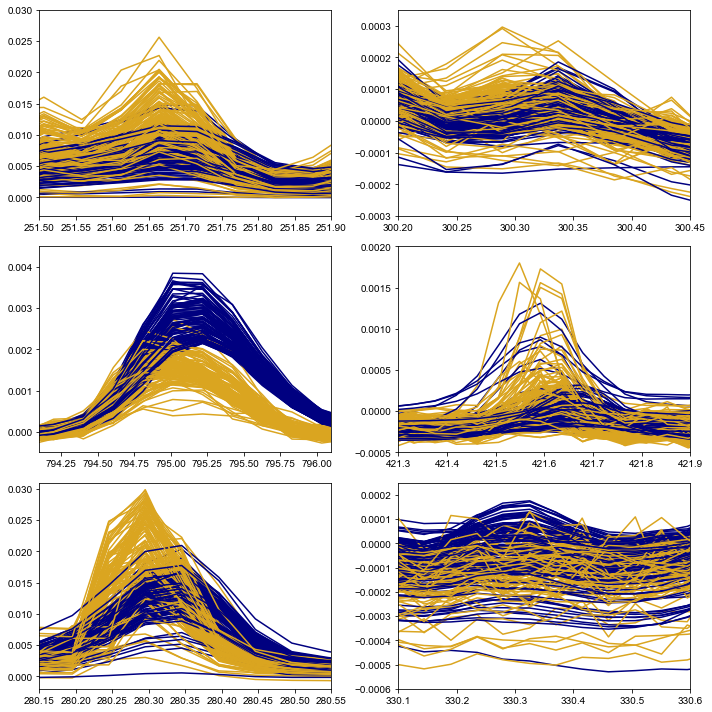

In [158]:
cc_c = '#000080'
cl_c = '#DAA520'
#op = 0.3
f = 18
#r1y = 0.75
#r2y = 0.48
#r3y = 0.215
#c1x = 0.075
#c2x = 0.5

fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (10,10), sharey=False)

for s in si_samples:
    axes[0,0].plot(wave, cc_spectra[s], color=cc_c)#, alpha = op) # CC
    axes[0,0].plot(wave, cl_spectra[s], color=cl_c)#, alpha = op) # CL
axes[0,0].set_xlim(251.5,251.9)
axes[0,0].set_ylim(-.003, 0.03)
#axes[0,0].annotate('Si', (c1x, r1y), xycoords = 'figure fraction', fontsize=f)

for s in ni_samples:
    axes[0,1].plot(wave, cc_spectra[s], color=cc_c)#, alpha = op) # CC
    axes[0,1].plot(wave, cl_spectra[s], color=cl_c)#, alpha = op) # CL
#axes[0,1].set_xlim(251.1,251.4)
axes[0,1].set_xlim(300.2,300.45)
axes[0,1].set_ylim(-0.0003, .00035)
#axes[0,1].annotate('Ni', (c2x, r1y), xycoords = 'figure fraction', fontsize=f)

for s in rb_samples:
    axes[1,0].plot(wave, cc_spectra[s], color=cc_c)#, alpha = op) # CC
    axes[1,0].plot(wave, cl_spectra[s], color=cl_c)#, alpha = op) # CL
axes[1,0].set_xlim(794.1,796.1)
axes[1,0].set_ylim(-0.0005, .0045)
#axes[1,0].annotate('Rb', (c1x, r2y), xycoords = 'figure fraction', fontsize=f)

for s in sr_samples:
    axes[1,1].plot(wave, cc_spectra[s], color=cc_c)#, alpha = op) # CC
    axes[1,1].plot(wave, cl_spectra[s], color=cl_c)#, alpha = op) # CL
#axes[1,1].set_xlim(407.45,408.1)
#axes[1,1].set_ylim(-0.0005, .005)
axes[1,1].set_xlim(421.3,421.9)
axes[1,1].set_ylim(-0.0005, .002)
#axes[1,1].annotate('Sr', (c2x, r2y), xycoords = 'figure fraction', fontsize=f)

for s in pb_samples:
    axes[2,0].plot(wave, cc_spectra[s], color=cc_c)#, alpha = op) # CC
    axes[2,0].plot(wave, cl_spectra[s], color=cl_c)#, alpha = op) # CL
#axes[2,0].set_xlim(261.3,261.65)
#axes[2,0].set_ylim(-0.002, .05)
axes[2,0].set_xlim(280.15,280.55)
axes[2,0].set_ylim(-0.002, .031)
#axes[2,0].annotate('Pb', (c1x, r3y), xycoords = 'figure fraction', fontsize=f)

for s in zn_samples:
    axes[2,1].plot(wave, cc_spectra[s], color=cc_c)#, alpha = op) # CC
    axes[2,1].plot(wave, cl_spectra[s], color=cl_c)#, alpha = op) # CL
axes[2,1].set_xlim(330.1,330.6)
axes[2,1].set_ylim(-0.0006, .00025)
#axes[2,1].annotate('Zn', (c2x, r3y), xycoords = 'figure fraction', fontsize=f)

plt.tight_layout()
plt.savefig(fp+'figures\\CC_CL_peak_comparison.eps', dpi=600)    
plt.show()

#### ATMOSPHERE

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


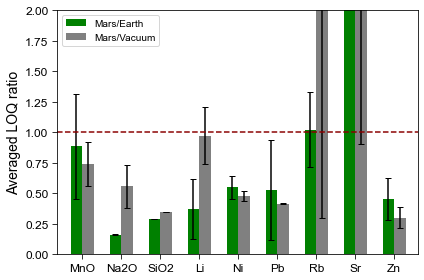

In [22]:
e_vals = []
v_vals = []
e_sds = []
v_sds = []
elems = []
for element in elem_list:
    e_temp = []
    v_temp = []
    for out in data.outlier_defn.unique():
        df = data[(data.element==element)&
                  (data.instrument=='CL')&
                  (data.outlier_defn==out)&
                  (data.sens_method=='braga')].copy(deep=True)
            
        mars_val = df[df.atmosphere=='Mars'].reset_index(drop=True)['loq'][0]
        earth_val = df[df.atmosphere=='Earth'].reset_index(drop=True)['loq'][0]
        vac_val = df[df.atmosphere=='Vacuum'].reset_index(drop=True)['loq'][0]

        e_ratio =  mars_val / earth_val
        v_ratio = mars_val / vac_val

        e_temp.append(e_ratio)
        v_temp.append(v_ratio)
    
    # get avg and std of ratio per element
    e_avg = statistics.mean(e_temp)
    e_sd = np.std(e_temp)
    v_avg = statistics.mean(v_temp)
    v_sd = np.std(v_temp)
    
    elems.append(element)
    e_vals.append(e_avg)
    e_sds.append(e_sd)
    v_vals.append(v_avg)
    v_sds.append(v_sd)
    
atm_ratios = pd.DataFrame({
    'element':elems,
    'earth_avg':e_vals,
    'earth_sd':e_sds,
    'vac_avg':v_vals,
    'vac_sd':v_sds
})

# tick locations
width = 0.6
et = [i*2 for i in atm_ratios.index]
vt = [x + width for x in et]
tk = [x + width/2 for x in et]

earth = plt.bar(et, 
                atm_ratios.earth_avg, 
                yerr=atm_ratios.earth_sd, 
                width=width,
                label='Mars/Earth',
                capsize=3,
                color='green')
vac = plt.bar(vt, 
              atm_ratios.vac_avg, 
              yerr=atm_ratios.vac_sd, 
              width=width,
              label='Mars/Vacuum',
              capsize=3,
              color='grey')

plt.xticks(tk, labels=atm_ratios.element,fontsize = 12)
plt.tick_params(length=5)
plt.yticks(fontsize=12)
plt.hlines(1, -1, 17.5, color='darkred', linestyles='dashed')
plt.legend(loc='best')
plt.ylabel('Averaged LOQ ratio', fontsize=14)
plt.ylim(0,2)
plt.xlim(-1, 17.5)
plt.tight_layout()
plt.savefig(fp + "figures\\atms_loq_ratio.eps", dpi=600)
plt.show()

### Sr ChemLIBS 0-750 regression vectors

In [21]:
earth = pd.read_csv(fp+'\\python_models\\norm3\\CL_Earth\\0-750\\iqr_q3\\Sr_coeffs.csv')
mars = pd.read_csv(fp+'\\python_models\\norm3\\CL_Mars\\0-750\\iqr_q3\\Sr_coeffs.csv')
vac = pd.read_csv(fp+'\\python_models\\norm3\\CL_Vacuum\\0-750\\iqr_q3\\Sr_coeffs.csv')
earth = earth['0']
mars = mars['0']
vac = vac['0']

wave = pd.read_csv(fp+'datasets\\CL_Mars_norm3_spectra.csv', usecols=['wave'])
wave=wave['wave']

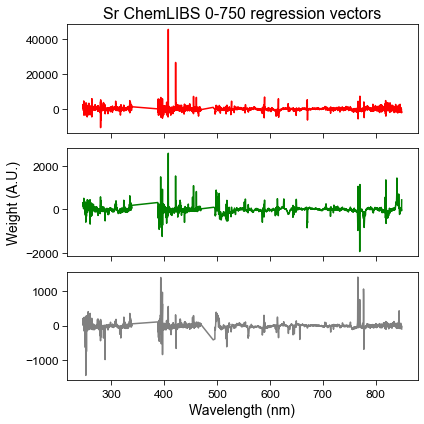

In [37]:
c_p = 'black'
xlab = 'Wavelength (nm)'
ylab = 'Weight (A.U.)'
title = 'Sr ChemLIBS 0-750 regression vectors'
xsize=14
klen=5
tsize=16
ksize=12

fig, (m, e, v) = plt.subplots(nrows = 3, ncols=1, figsize = (6,6))

m.plot(wave, mars, label = 'Mars', c='red')
e.plot(wave, earth, label = 'Earth', c='green')
v.plot(wave, vac, label = 'Vacuum', c='grey')

v.set_xlabel(xlab, fontsize = xsize)
e.set_ylabel(ylab, fontsize = xsize)
v.tick_params(length=klen, labelsize=ksize)
e.axes.xaxis.set_ticklabels([])
m.axes.xaxis.set_ticklabels([])
e.tick_params(length=klen, labelsize=ksize)
m.tick_params(length=klen, labelsize=ksize)
m.set_title(title, fontsize=tsize)

# save
plt.tight_layout()
plt.savefig(fp+'\\figures\\Sr_reg_vector_atm_comparison.eps', dpi=600)
plt.show()